In [85]:
W = CoxeterGroup(['H', 4],implementation="coxeter3")  ### FIX W.bruhat_poset()
[s1,s2,s3,s4] = W.simple_reflections()

##################################################################################

n = rank(W)
w0 = W.long_element()
e = W([])


####### Kazhdan-Lusztig polynomials ##########################

# A faster implementation of KL-polynomials (using the optional package Coxeter 3) is given by this
# Fokko Ducloux’s Coxeter3 C++ library.

# Had to install it: I just typed "sage -i coxeter3" in the terminal.

# It seems that one can direcly coerce from WeylGroup to CoxeterGroup and vice versa.
# I will therefore use CoxeterGroup to calculate KL-polynomials, but for all other Bruhat business I will use WeylGroup.

R.<q> = LaurentPolynomialRing(QQ)




def KLP(x,y):
    '''Returns the KL-polynomial, implemented in "Coxeter3" package by Fokko du Cloux.
    http://math.univ-lyon1.fr/~ducloux/coxeter/coxeter3/english/coxeter3_e.html'''
    
    if x not in W:
        x = convert_from_123(x)
    if y not in W:
        y = convert_from_123(y)
    
    return W.kazhdan_lusztig_polynomial(x,y)


def mu(w,x):
    '''Returns the KL mu-function with arguments w,x.
    By Humphrey's BGG book p. 175 and p. 169, for w<x we have:
    mu(x,w) = mu(w0*w,w0*x),
    mu(w,x) = dim Exit^1 (L_w,L_x) = dim Exit^1(L_x,L_w) = dim Exit^1(Delta_x,L_w).'''

    if w not in W:
        w = convert_from_123(w)
    if x not in W:
        x = convert_from_123(x)
        
    if w.bruhat_le(x):
        poly_dict = KLP(w,x).dict()       
        j = (x.length()-w.length()-1)/2 
        if j not in poly_dict.keys():
            return 0
        return poly_dict[j]

    return 0


def DR(w):
    '''Returns the set of simple right descents of w.'''
    
    return {W.simple_reflections()[i] for i in w.descents()}


def DL(w):
    '''Returns the set of simple left   descents of w.'''
        
    return DR(w.inverse())


def AL(w):
    '''Returns the set of simple left ascends of w.'''
    
    DescLe = list(DL(w))
    AscLe = [s for s in W.simple_reflections() if s not in DescLe]
    return set(AscLe)


def AR(w):
    '''Returns the set of simple right ascends of w.'''
    
    DescRi = list(DR(w))
    AscRi = [s for s in W.simple_reflections() if s not in DescRi]
    return set(AscRi)



#### Coxeter non-Weyl group speciffic functions:

def bruhat_interval(x,y):
    '''A fix for W.bruhat_interval(), which does not work correctly for '''
    
    return [W(z) for z in W.bruhat_interval(x,y)]


def convert_to_123(w):
    '''E.g. s1*s2*s1 = [1, 2, 1] maps to "121".'''
    
    w = W(w)
    if w == e:
        return "e"
    return "".join([str(t) for t in list(w)])
    
    



In [86]:
if CartanType(W)[0] == "H" and CartanType(W)[1] == 3:
    
    ######################## H3 ########################

    #sum_J KL = 43

    #bigrassmannians: 43

    bigrassmannians = [W(x) for x in [[3], [2], [3, 2], [2, 3], [3, 2, 3], [2, 3, 2], [3, 2, 3, 2], [2, 3, 2, 3], [1], [2, 1], [3, 2, 1], [2, 3, 2, 1], [3, 2, 3, 2, 1], [1, 2], [2, 3, 1, 2], [3, 2, 3, 1, 2], [2, 3, 2, 3, 1, 2], [1, 2, 3], [2, 3, 1, 2, 3], [3, 2, 3, 1, 2, 3], [2, 3, 2, 3, 1, 2, 3], [1, 2, 3, 2], [2, 3, 1, 2, 3, 2], [3, 2, 3, 1, 2, 3, 2], [2, 3, 2, 1, 2, 3, 2], [3, 2, 3, 2, 1, 2, 3, 2], [2, 3, 2, 3, 1, 2, 3, 2], [1, 2, 3, 2, 3], [2, 3, 2, 1, 2, 3, 2, 3], [3, 2, 3, 2, 1, 2, 3, 2, 3], [1, 2, 3, 2, 1], [2, 3, 1, 2, 3, 2, 1], [3, 2, 3, 1, 2, 3, 2, 1], [2, 3, 2, 3, 1, 2, 3, 2, 1], [1, 2, 3, 2, 3, 1, 2], [2, 3, 2, 1, 2, 3, 2, 3, 1, 2], [3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2], [1, 2, 3, 2, 3, 1, 2, 3], [2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3], [3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3], [1, 2, 3, 2, 3, 1, 2, 3, 2], [2, 3, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2], [1, 2, 3, 2, 3, 1, 2, 3, 2, 1]]]
    
    #join_irreducibles = dissectors: 42

    join_irreducibles = [W(x) for x in [[3], [2], [1], [2, 3], [3, 2], [2, 3, 2], [3, 2, 3], [2, 3, 2, 3], [3, 2, 3, 2], [1, 2], [2, 1], [3, 2, 1], [1, 2, 3], [2, 3, 2, 1], [3, 2, 3, 2, 1], [1, 2, 3, 2], [2, 3, 2, 3, 1, 2], [1, 2, 3, 2, 3], [3, 2, 3, 1, 2, 3], [1, 2, 3, 2, 1], [2, 3, 2, 3, 1, 2, 3], [2, 3, 1, 2, 3, 2], [3, 2, 3, 1, 2, 3, 2], [2, 3, 2, 3, 1, 2, 3, 2], [2, 3, 1, 2], [3, 2, 3, 1, 2], [3, 2, 3, 2, 1, 2, 3, 2], [1, 2, 3, 2, 3, 1, 2], [2, 3, 1, 2, 3], [2, 3, 1, 2, 3, 2, 1], [3, 2, 3, 2, 1, 2, 3, 2, 3], [3, 2, 3, 1, 2, 3, 2, 1], [1, 2, 3, 2, 3, 1, 2, 3], [2, 3, 2, 3, 1, 2, 3, 2, 1], [1, 2, 3, 2, 3, 1, 2, 3, 2], [3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2], [2, 3, 2, 1, 2, 3, 2, 3], [2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3], [3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3], [1, 2, 3, 2, 3, 1, 2, 3, 2, 1], [2, 3, 2, 1, 2, 3, 2, 3, 1, 2], [2, 3, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2]]]
    dissectors = [x for x in join_irreducibles]    
    
    
if CartanType(W)[0] == "H" and CartanType(W)[1] == 4:
    
    ######################## H4 ########################

    #sum_J KL = 476

    #bigrassmannians: 756

    bigrassmannians = [W(x) for x in [[4], [3], [4, 3], [3, 4], [4, 3, 4], [3, 4, 3], [4, 3, 4, 3], [3, 4, 3, 4], [2], [3, 2], [4, 3, 2], [3, 4, 3, 2], [4, 3, 4, 3, 2], [2, 3], [3, 4, 2, 3], [4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3], [2, 3, 4], [3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3], [3, 4, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4], [2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1], [2, 1], [3, 2, 1], [4, 3, 2, 1], [3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 1], [2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2], [2, 3, 1, 2], [3, 4, 2, 3, 1, 2], [4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 1, 2], [3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [1, 2, 3], [2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3], [2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [1, 2, 3, 4, 3, 2], [2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1]]]

    #join_irreducibles = dissectors: 469

    join_irreducibles = [W(x) for x in [[4], [3], [2], [1], [4, 3], [3, 4], [3, 2], [2, 3], [2, 1], [1, 2], [4, 3, 4], [4, 3, 2], [3, 4, 3], [3, 2, 1], [2, 3, 4], [1, 2, 3], [4, 3, 4, 3], [4, 3, 2, 1], [3, 4, 3, 4], [3, 4, 2, 3], [3, 4, 3, 2], [2, 3, 4, 3], [2, 3, 1, 2], [1, 2, 3, 4], [4, 3, 4, 2, 3], [4, 3, 4, 3, 2], [3, 4, 2, 3, 4], [3, 4, 3, 2, 1], [2, 3, 4, 3, 4], [2, 3, 4, 3, 2], [1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 1, 2], [2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4], [1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4], [4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3], [2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2], [2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3], [3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [4, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4], [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2], [3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3]]]
    dissectors = [x for x in join_irreducibles]

In [87]:
JI = {}
for x in join_irreducibles:
    i = x[0]
    j = x[-1]
    
    if (i,j) not in JI.keys():
        JI[(i,j)] = []
    JI[(i,j)].append(x)

BG = {}
for x in join_irreducibles:
    i = x[0]
    j = x[-1]
    
    if (i,j) not in BG.keys():
        BG[(i,j)] = []
    BG[(i,j)].append(x)

def br_le(x,y):
    return x.bruhat_le(y)
    
def W_subposet(L):
    return Poset((L,br_le))


def human(w):
    return "".join([str(i) for i in w])  +"({})".format(w.length())

def is_socle_killing_pair(u,v,i,j):
    '''Assuming u<v, and both in the same JI(i,j).'''

    if u.bruhat_le( W.simple_reflections()[i] * v ) or u.bruhat_le(v* W.simple_reflections()[j]):
        return True
    return False


def print_poset(P, **kwargs):
    size = kwargs.get('size', 10)
    red = kwargs.get('red', False)
    i = kwargs.get('i', None)
    j = kwargs.get('j', None)
    
    if red==True:
        color = {"red" : [(human(x[0]),human(x[1])) for x in P.cover_relations() if not is_socle_killing_pair(x[0],x[1],i,j)]}
    else:
        color = {}
    #show(P.relabel(lambda x: human(x)).plot(figsize = size, vertex_shape="x", vertex_color="white",  cover_colors = color))
    return P.relabel(lambda x: human(x)).plot(figsize = size, 
                                               vertex_shape="x", 
                                               vertex_color="white",  
                                               cover_colors = color)

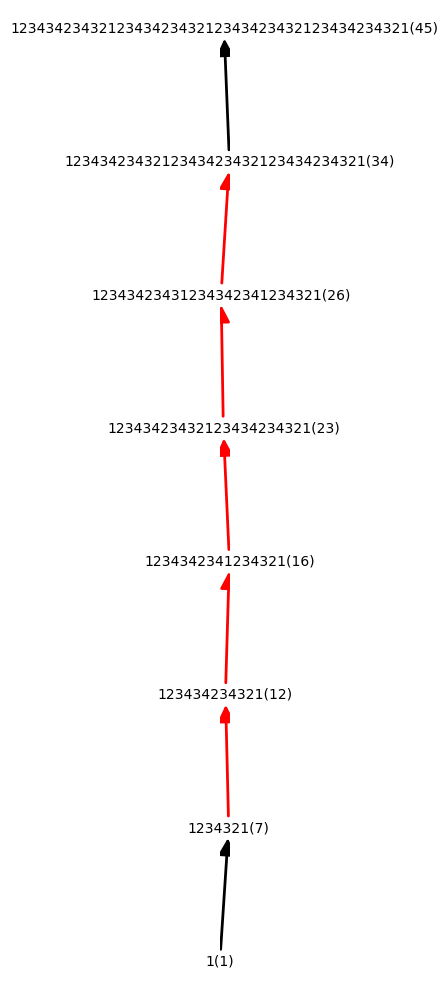

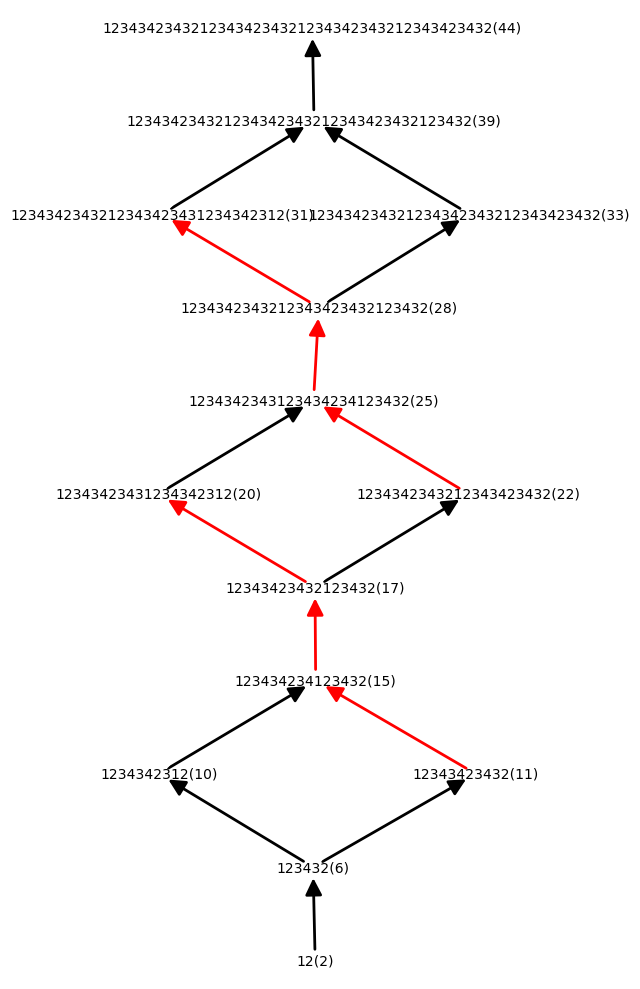

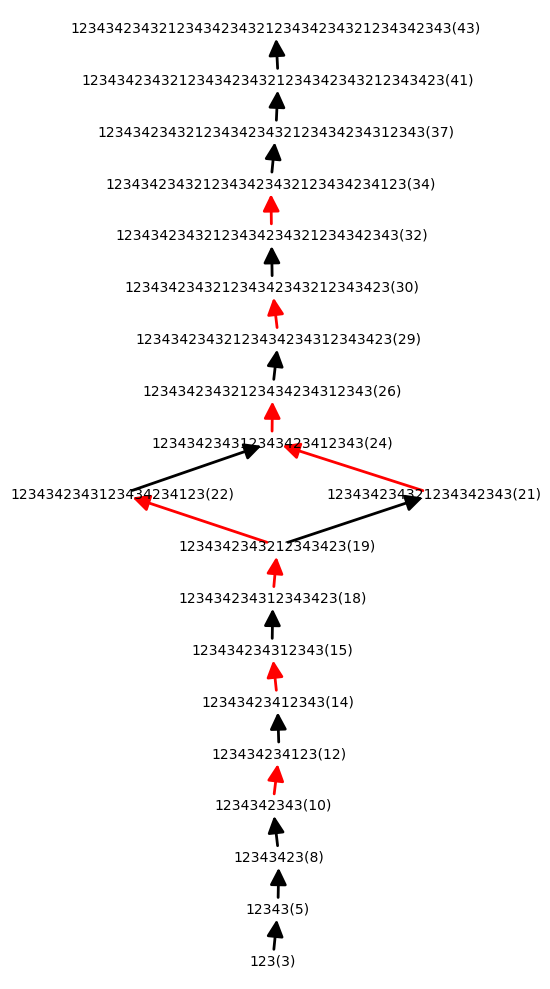

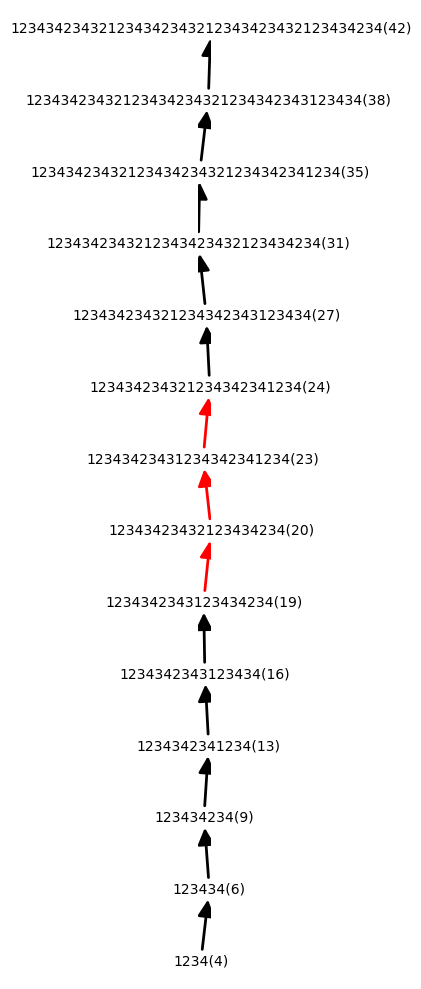

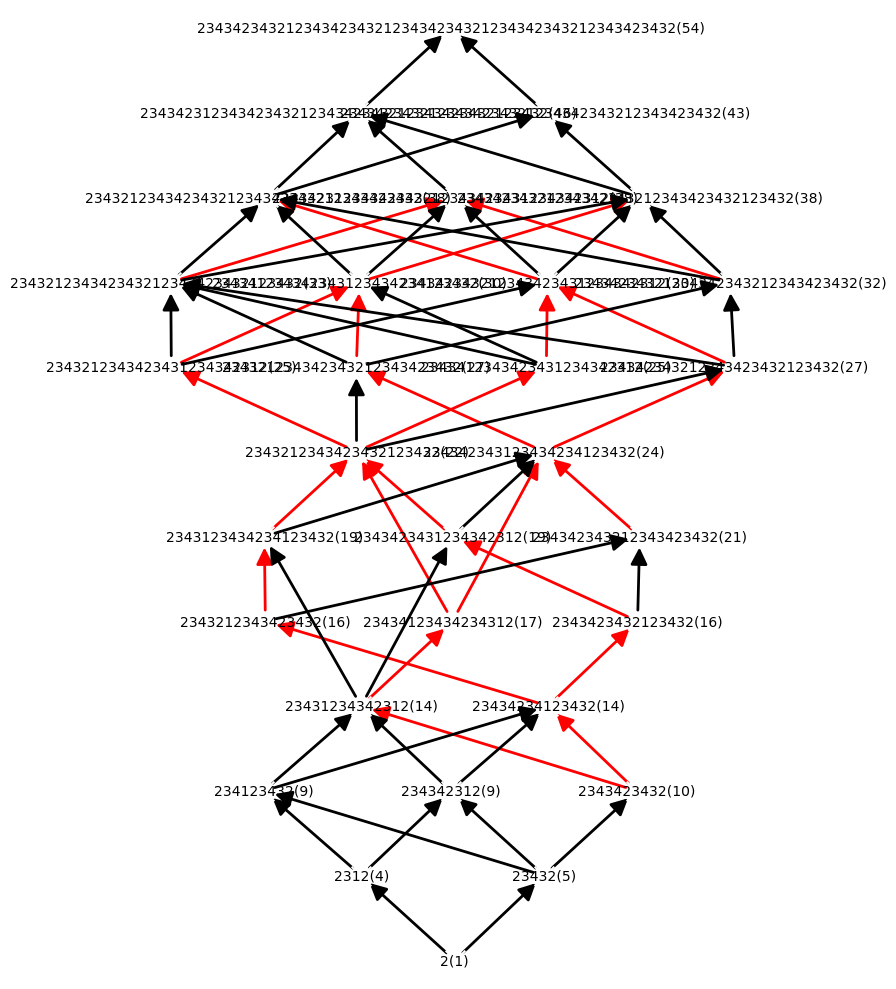

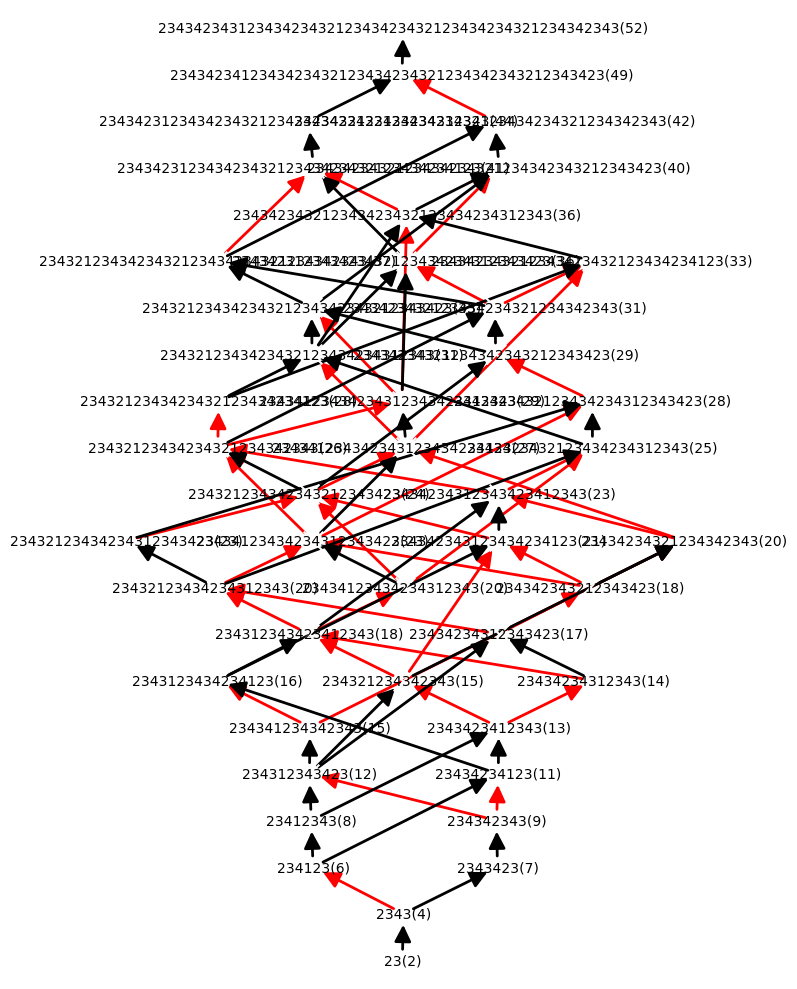

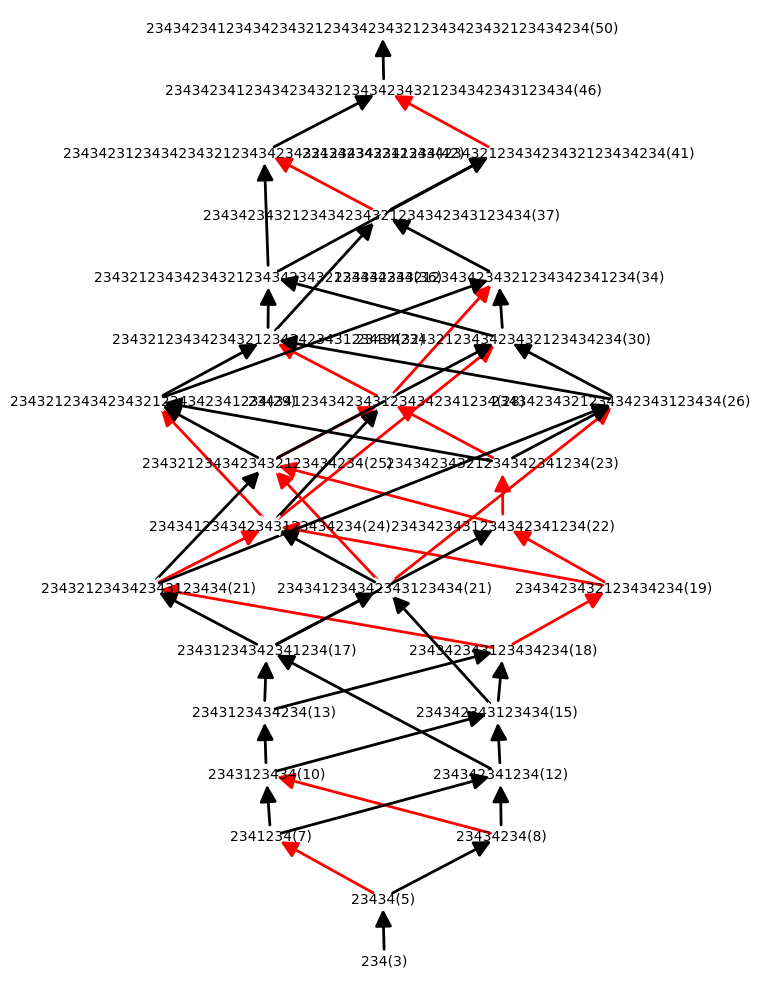

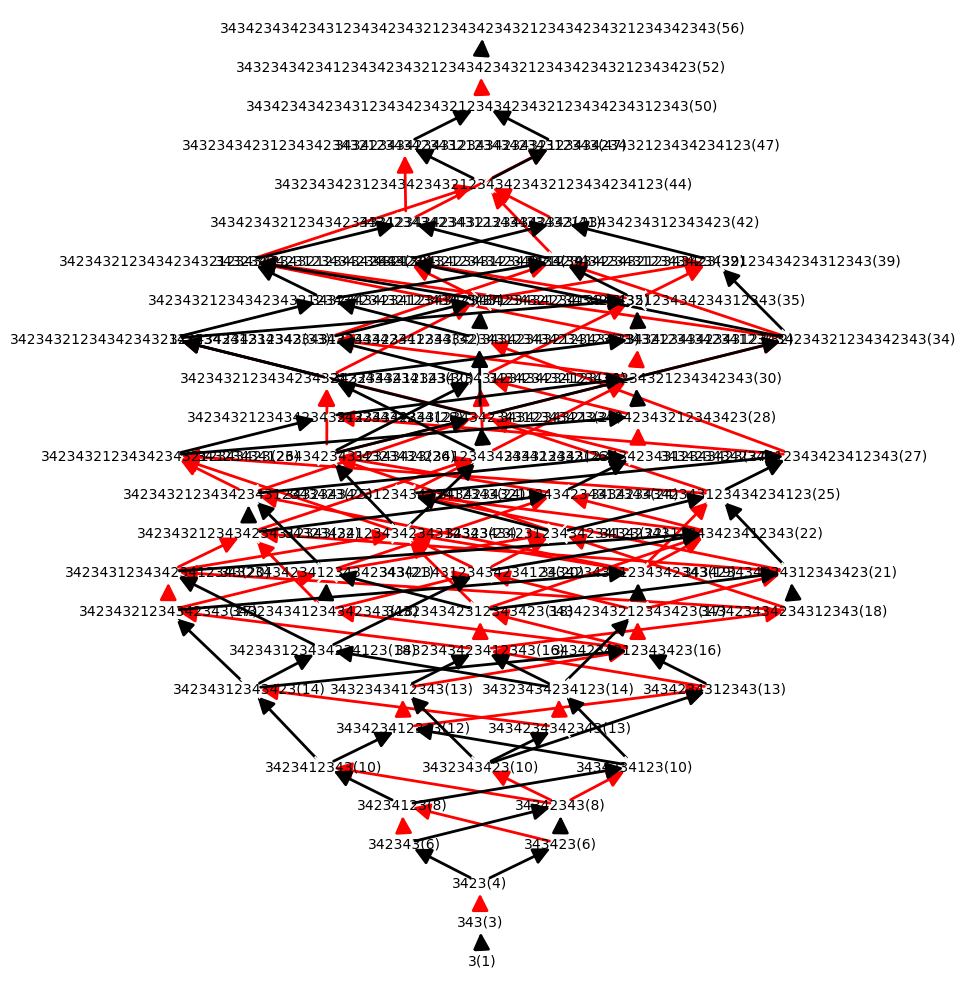

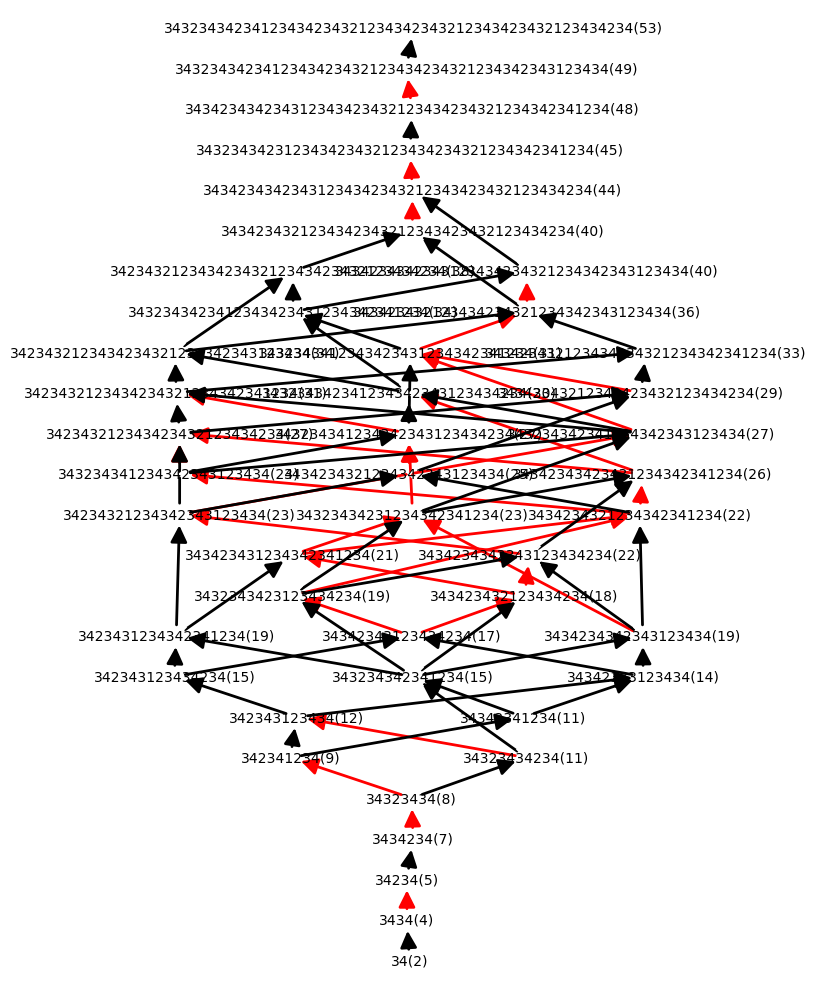

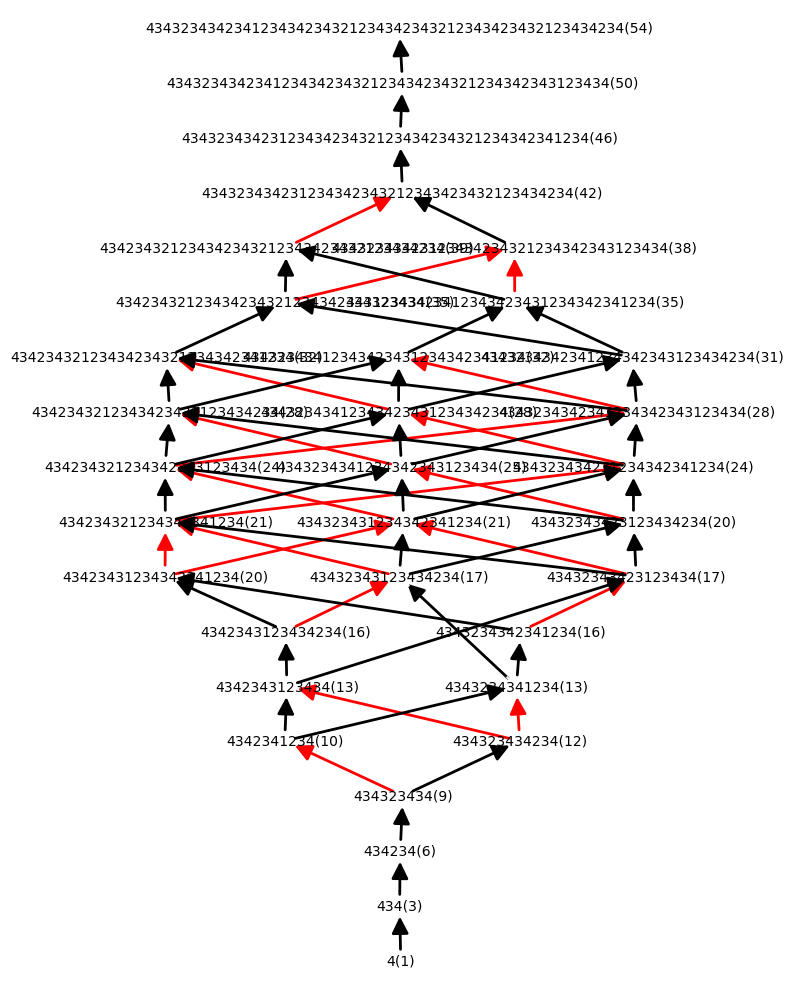

In [88]:
for i in range(1,n+1):
    for j in range(i,n+1):
        P = W_subposet(JI[(i,j)])
        print_poset(P, size=15, red=True, i=i, j=j).show()

In [90]:
for i in range(1,n+1):
    for j in range(i,n+1):
        
        
        Temp = JI[(i,j)]
        
        for x in Temp:
            for y in Temp:
                if x != y and x.bruhat_le(y) and not is_socle_killing_pair(x,y,i,j):
                    for z in Temp:
                        if y != z and y.bruhat_le(z) and not is_socle_killing_pair(y,z,i,j):
                            if not is_socle_killing_pair(x,z,i,j):
                                print(x,y,z)

[2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3] [2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3] [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3]
[2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3] [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3] [2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3]
[2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3] [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3] [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3]
[2, 3, 4, 3, 4, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3] [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3] [2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3]
[2, 3, 4, 3, 4, 2, 3, 4, 3, 1, 2, 3, 4, 3, 4, 2, 3, 4, 1, 2, 3, 4, 3] [2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4,